In [1]:
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt
import rosbag
import pandas as pd
from scipy import integrate
from scipy.interpolate import interp1d
from IPython.display import display
from mpldatacursor import datacursor
import time
import math
#from SimpleCV import Display, Image, Color
import cv2
from cv_bridge import CvBridge
import sys, getopt
import Equirec2Perspec as E2P 

In [2]:
filename='ricoh_calib1'

bag  = rosbag.Bag('/home/maleen/' + filename + '.bag')

In [3]:
ricoh_time=np.array([])
ricoh_seq=np.array([])
img=np.array([])
ricohsize=0



topiclist=['/camera/image_raw']

for topic, msg, t in bag.read_messages(topics=topiclist): #
    
        if topic=='/camera/image_raw':
            
            ricoh_time=np.append(ricoh_time,(msg.header.stamp.secs)+(Decimal(msg.header.stamp.nsecs)/1000000000))
            ricoh_seq=np.append(ricoh_seq,msg.header.seq)
            
            img=np.append(img,msg)
            
            ricohsize=ricohsize+1
            
            

In [4]:
bridge = CvBridge()
full_images=[]


for x in range(0,ricohsize):

    cv_image = bridge.imgmsg_to_cv2(img[x], desired_encoding="passthrough")

    full_images.append(cv_image)
    

#plt.imshow(cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB))


In [7]:
#CROP

cropped_images=[]

for x in range(0,ricohsize):
    
    fullimg=full_images[x]
    
    crop = fullimg[0:640,640:1280]
    
    cropped_images.append(crop)
    
    
    
   

In [10]:
#ROTATION

final_images=[]

(h, w) = crop.shape[:2]

# calculate the center of the image
center = (w / 2, h / 2)
angle90 = 90
scale = 1.0

M = cv2.getRotationMatrix2D(center, angle90, scale)


for x in range(0,ricohsize):
    
    ci=cropped_images[x]
    
    rotated90 = cv2.warpAffine(ci, M, (h, w))
    
    temp=cv2.cvtColor(rotated90, cv2.COLOR_BGR2RGB)
    
    final_images.append(temp)

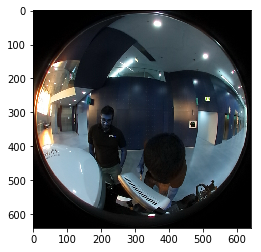

In [14]:
test=final_images[5]

plt.imshow(test)
plt.show()
#plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB))
for x in range(0,ricohsize):

     cv2.imwrite('calib1'+"-"+ str(x) + ".png",final_images[x])